In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
ordinal_elastic = pd.read_csv('Ordinal+Elastic.csv')
ordinal_elastic.shape

(2580, 84)

In [3]:
X_ordinal = ordinal_elastic.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_elastic.SalePrice.values

In [4]:
X_ordinal.shape

(2580, 83)

In [5]:
len(Y_ordinal)

2580

In [6]:
X_ordinal.shape[1]

83

In [7]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [8]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.927697,12229.336864
1,0.926764,13480.927211
2,0.929023,13790.344604
3,0.936949,11660.440734
4,0.926208,12438.808146
5,0.934311,12950.888723
6,0.927452,12817.246869
7,0.880645,13080.683358
8,0.933356,12015.795552
9,0.891316,13369.878840


In [9]:
Ordinal.describe()

,AR2_Ordinal,MAE_Ordinal
count,100.000000,100.000000
mean,0.921276,12669.973712
std,0.020780,567.699205
min,0.868227,11660.440734
25%,0.916932,12147.894604
50%,0.928680,12636.070098
75%,0.936016,13046.652136
max,0.946863,14150.563330


In [10]:
ord_elastic_drop1 = pd.read_csv('Ordinal+Elastic_Drop1.csv')
ord_elastic_drop1.shape

(2579, 84)

In [11]:
X_ord_drop1 = ord_elastic_drop1.drop(['SalePrice'], axis=1).values
Y_ord_drop1 = ord_elastic_drop1.SalePrice.values

In [12]:
X_ord_drop1.shape

(2579, 83)

In [ ]:
len(Y_ord_drop1)

In [13]:
X_ord_drop1.shape[1]

83

In [14]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ord_drop1,Y_ord_drop1,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ord_drop1)-1)/(len(Y_ord_drop1)-X_ord_drop1.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)

In [15]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.937135,12412.433461
1,0.924375,12531.305953
2,0.930841,12668.851938
3,0.937622,12160.136931
4,0.937856,12290.818399
5,0.950632,11598.828749
6,0.943358,11561.415371
7,0.935724,12601.535029
8,0.936105,12308.913875
9,0.937381,12909.843892


In [16]:
OrdinalDrop1.describe()

,AR2_Drop1,MAE_Drop1
count,100.000000,100.000000
mean,0.931747,12488.704768
std,0.008101,557.816759
min,0.909526,11198.671515
25%,0.926375,12139.461601
50%,0.932421,12497.191058
75%,0.937735,12845.905541
max,0.950632,13891.714044


In [17]:
ord_elastic_dropIF = pd.read_csv('Ordinal+Elastic_DropIF.csv')
ord_elastic_dropIF.shape

(2568, 84)

In [18]:
X3 = ord_elastic_dropIF.drop(['SalePrice'], axis=1).values
Y3 = ord_elastic_dropIF.SalePrice.values

In [19]:
X3.shape

(2568, 83)

In [20]:
len(Y3)

2568

In [21]:
X3.shape[1]

83

In [22]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y3)-1)/(len(Y3)-X3.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [23]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.926770,12367.615386
1,0.940622,12712.391179
2,0.948355,11628.106722
3,0.944297,11555.963523
4,0.933214,12478.339728
5,0.935308,12509.488604
6,0.950678,10891.105207
7,0.943676,11324.287560
8,0.939463,12500.566777
9,0.938499,11740.108584


In [24]:
OrdinalDropIF.describe()

,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000
mean,0.936685,12298.053531
std,0.006879,516.960584
min,0.917614,10891.105207
25%,0.932027,11972.809258
50%,0.937522,12362.814757
75%,0.941663,12639.682397
max,0.950678,13516.204445


In [25]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.927697,12229.336864,0.937135,12412.433461,0.926770,12367.615386
1,0.926764,13480.927211,0.924375,12531.305953,0.940622,12712.391179
2,0.929023,13790.344604,0.930841,12668.851938,0.948355,11628.106722
3,0.936949,11660.440734,0.937622,12160.136931,0.944297,11555.963523
4,0.926208,12438.808146,0.937856,12290.818399,0.933214,12478.339728
5,0.934311,12950.888723,0.950632,11598.828749,0.935308,12509.488604
6,0.927452,12817.246869,0.943358,11561.415371,0.950678,10891.105207
7,0.880645,13080.683358,0.935724,12601.535029,0.943676,11324.287560
8,0.933356,12015.795552,0.936105,12308.913875,0.939463,12500.566777
9,0.891316,13369.878840,0.937381,12909.843892,0.938499,11740.108584


In [26]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.921276,12669.973712,0.931747,12488.704768,0.936685,12298.053531
std,0.020780,567.699205,0.008101,557.816759,0.006879,516.960584
min,0.868227,11660.440734,0.909526,11198.671515,0.917614,10891.105207
25%,0.916932,12147.894604,0.926375,12139.461601,0.932027,11972.809258
50%,0.928680,12636.070098,0.932421,12497.191058,0.937522,12362.814757
75%,0.936016,13046.652136,0.937735,12845.905541,0.941663,12639.682397
max,0.946863,14150.563330,0.950632,13891.714044,0.950678,13516.204445


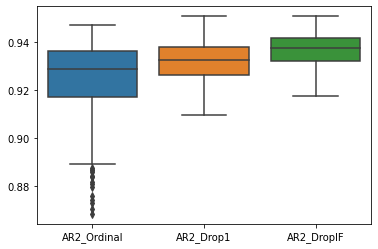

In [27]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

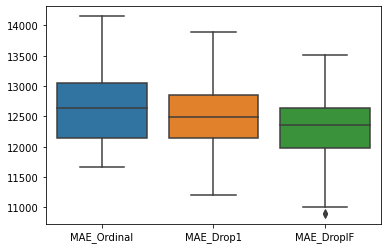

In [28]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);